In [ ]:
# ================================================================
# CELL 1: Mount Drive and Verify Access to Shared Folder
# ================================================================

from google.colab import drive
import os
from pathlib import Path

# Mount NEW account's Drive
drive.mount('/content/drive')

# Path to shared folder (should be same as before if you added shortcut to "My Drive")
PROJECT_DIR = '/content/drive/MyDrive/PA-Diff-Training'

# If you didn't add shortcut, it might be in Shared drives:
# PROJECT_DIR = '/content/drive/Shareddrives/PA-Diff-Training'

# Verify all folders exist
folders_to_check = {
    'Checkpoint': f'{PROJECT_DIR}/checkpoint',
    'Logs': f'{PROJECT_DIR}/logs',
    'Metrics': f'{PROJECT_DIR}/metrics',
    'Plots': f'{PROJECT_DIR}/plots',
    'Results': f'{PROJECT_DIR}/results',
    'Processed Data': f'{PROJECT_DIR}/data/UIEB_processed'  # Adjust if different
}

print("="*60)
print("VERIFYING SHARED FOLDER ACCESS")
print("="*60)
all_good = True
for name, path in folders_to_check.items():
    exists = os.path.exists(path)
    status = "✅" if exists else "❌"
    print(f"{status} {name}: {path}")
    if not exists:
        all_good = False

if all_good:
    print("\n🎉 All folders accessible! Ready to resume training.")
else:
    print("\n⚠️  Some folders missing. Check if shortcut was added to 'My Drive'")
    print("   OR adjust PROJECT_DIR path above")

# Set paths for later cells
CHECKPOINT_DIR = f'{PROJECT_DIR}/checkpoint'
LOGS_DIR = f'{PROJECT_DIR}/logs'
METRICS_DIR = f'{PROJECT_DIR}/metrics'
PLOTS_DIR = f'{PROJECT_DIR}/plots'
RESULTS_DIR = f'{PROJECT_DIR}/results'
DATA_DIR = f'{PROJECT_DIR}/data'  # Where UIEB_processed is


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
VERIFYING SHARED FOLDER ACCESS
✅ Checkpoint: /content/drive/MyDrive/PA-Diff-Training/checkpoint
✅ Logs: /content/drive/MyDrive/PA-Diff-Training/logs
✅ Metrics: /content/drive/MyDrive/PA-Diff-Training/metrics
✅ Plots: /content/drive/MyDrive/PA-Diff-Training/plots
✅ Results: /content/drive/MyDrive/PA-Diff-Training/results
❌ Processed Data: /content/drive/MyDrive/PA-Diff-Training/data/UIEB_processed

⚠️  Some folders missing. Check if shortcut was added to 'My Drive'
   OR adjust PROJECT_DIR path above


In [ ]:
# ================================================================
# CELL 2: Clone Repository & Install Dependencies
# ================================================================

# Clone PA-Diff
%cd /content
!git clone https://github.com/chenydong/PA-Diff.git
%cd PA-Diff

print("✅ Repository cloned")

# Install PyTorch with CUDA 12.1
!pip install -q torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

# Install other dependencies
!pip install -q einops opencv-python tensorboardX lmdb tqdm scikit-image scipy matplotlib seaborn pandas

print("✅ Dependencies installed")

# Verify GPU
import torch
print(f"\n🎮 GPU Available: {torch.cuda.is_available()}")
print(f"🎮 GPU Name: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'None'}")
print(f"🎮 GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")


/content
Cloning into 'PA-Diff'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 125 (delta 34), reused 1 (delta 1), pack-reused 65 (from 1)
Receiving objects: 100% (125/125), 277.32 KiB | 12.06 MiB/s, done.
Resolving deltas: 100% (40/40), done.
/content/PA-Diff
✅ Repository cloned
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.4/299.4 kB 16.6 MB/s eta 0:00:00
✅ Dependencies installed

🎮 GPU Available: True
🎮 GPU Name: Tesla T4
🎮 GPU Memory: 15.83 GB


In [ ]:
# ================================================================
# CELL 3: Setup Kaggle & Download BOTH UIEB Datasets
# ================================================================

from google.colab import files

# DATA_DIR will be local (not in Drive for speed)
DATA_DIR = '/content/data'
import os
os.makedirs(DATA_DIR, exist_ok=True)

# Upload kaggle.json
print("📤 Please upload your kaggle.json file:")
uploaded = files.upload()

# Setup Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("✅ Kaggle credentials configured")

# Download UIEB RAW dataset (degraded/input images)
print("\n📥 Downloading UIEB RAW dataset (input images)...")
!kaggle datasets download -d larjeck/uieb-dataset-raw -p {DATA_DIR}
!unzip -q {DATA_DIR}/uieb-dataset-raw.zip -d {DATA_DIR}/UIEB_raw

# Download UIEB REFERENCE dataset (enhanced/ground truth images)
print("📥 Downloading UIEB REFERENCE dataset (ground truth images)...")
!kaggle datasets download -d larjeck/uieb-dataset-reference -p {DATA_DIR}
!unzip -q {DATA_DIR}/uieb-dataset-reference.zip -d {DATA_DIR}/UIEB_reference

print("✅ Both datasets downloaded")

# Verify downloads
raw_dir = f"{DATA_DIR}/UIEB_raw"
ref_dir = f"{DATA_DIR}/UIEB_reference"

# Find actual subdirectories (datasets might be in subdirectories)
from pathlib import Path

def find_image_dir(base_dir):
    """Find the directory containing images"""
    base_path = Path(base_dir)
    # Look for directories with images
    for root, dirs, files in os.walk(base_path):
        img_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if len(img_files) > 0:
            return root
    return base_dir

raw_img_dir = find_image_dir(raw_dir)
ref_img_dir = find_image_dir(ref_dir)

print(f"\n📊 Raw images location: {raw_img_dir}")
print(f"📊 Reference images location: {ref_img_dir}")


📤 Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
✅ Kaggle credentials configured

📥 Downloading UIEB RAW dataset (input images)...
Dataset URL: https://www.kaggle.com/datasets/larjeck/uieb-dataset-raw
License(s): apache-2.0
 98% 618M/634M [00:04<00:00, 110MB/s] 
100% 634M/634M [00:04<00:00, 147MB/s]
📥 Downloading UIEB REFERENCE dataset (ground truth images)...
Dataset URL: https://www.kaggle.com/datasets/larjeck/uieb-dataset-reference
License(s): apache-2.0
100% 785M/785M [00:08<00:00, 79.8MB/s]
100% 785M/785M [00:08<00:00, 101MB/s] 
✅ Both datasets downloaded

📊 Raw images location: /content/data/UIEB_raw/raw-890
📊 Reference images location: /content/data/UIEB_reference/reference-890


In [ ]:
# ================================================================
# CELL 4: Prepare Dataset for PA-Diff Format
# ================================================================

import cv2
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from tqdm import tqdm

def prepare_uieb_for_padiff(raw_dir, ref_dir, output_dir, split_ratio=0.8):
    """
    Prepare UIEB dataset in PA-Diff expected format
    """
    raw_path = Path(raw_dir)
    ref_path = Path(ref_dir)
    output_path = Path(output_dir)

    # Get all images
    raw_imgs = sorted(list(raw_path.glob("*.png")) + list(raw_path.glob("*.jpg")))
    ref_imgs = sorted(list(ref_path.glob("*.png")) + list(ref_path.glob("*.jpg")))

    print(f"Found {len(raw_imgs)} raw images")
    print(f"Found {len(ref_imgs)} reference images")

    # Ensure we have pairs
    min_len = min(len(raw_imgs), len(ref_imgs))
    raw_imgs = raw_imgs[:min_len]
    ref_imgs = ref_imgs[:min_len]

    pairs = list(zip(raw_imgs, ref_imgs))

    # Split 80-20 (SAME RANDOM SEED = SAME SPLIT AS BEFORE)
    train_pairs, val_pairs = train_test_split(pairs, train_size=split_ratio, random_state=42)

    print(f"\n✅ Train: {len(train_pairs)} pairs")
    print(f"✅ Val: {len(val_pairs)} pairs")

    # Create directory structure
    train_input_dir = output_path / "UIEB_train_16_256" / "sr_16_256"
    train_gt_dir = output_path / "UIEB_train_16_256" / "hr_256"
    val_input_dir = output_path / "UIEB_val_16_256" / "sr_16_256"
    val_gt_dir = output_path / "UIEB_val_16_256" / "hr_256"

    for dir_path in [train_input_dir, train_gt_dir, val_input_dir, val_gt_dir]:
        dir_path.mkdir(parents=True, exist_ok=True)

    # Process training images
    print("\n🔄 Processing training images...")
    for idx, (raw_img, ref_img) in enumerate(tqdm(train_pairs, desc="Train")):
        try:
            raw_cv = cv2.imread(str(raw_img))
            ref_cv = cv2.imread(str(ref_img))

            # Resize to 256x256 as required by PA-Diff
            raw_resized = cv2.resize(raw_cv, (256, 256))
            ref_resized = cv2.resize(ref_cv, (256, 256))

            # Save: raw -> sr_16_256 (input), reference -> hr_256 (GT)
            cv2.imwrite(str(train_input_dir / f"{idx:04d}.png"), raw_resized)
            cv2.imwrite(str(train_gt_dir / f"{idx:04d}.png"), ref_resized)
        except Exception as e:
            print(f"Error processing train pair {idx}: {e}")

    # Process validation images
    print("🔄 Processing validation images...")
    for idx, (raw_img, ref_img) in enumerate(tqdm(val_pairs, desc="Val")):
        try:
            raw_cv = cv2.imread(str(raw_img))
            ref_cv = cv2.imread(str(ref_img))

            raw_resized = cv2.resize(raw_cv, (256, 256))
            ref_resized = cv2.resize(ref_cv, (256, 256))

            cv2.imwrite(str(val_input_dir / f"{idx:04d}.png"), raw_resized)
            cv2.imwrite(str(val_gt_dir / f"{idx:04d}.png"), ref_resized)
        except Exception as e:
            print(f"Error processing val pair {idx}: {e}")

    print("\n✅ Dataset preparation complete!")
    print(f"\n📂 Dataset structure:")
    print(f"  Train input: {len(list(train_input_dir.glob('*.png')))} images")
    print(f"  Train GT: {len(list(train_gt_dir.glob('*.png')))} images")
    print(f"  Val input: {len(list(val_input_dir.glob('*.png')))} images")
    print(f"  Val GT: {len(list(val_gt_dir.glob('*.png')))} images")

    return str(output_path)

# Run dataset preparation
dataset_root = prepare_uieb_for_padiff(
    raw_dir=raw_img_dir,
    ref_dir=ref_img_dir,
    output_dir=f"{DATA_DIR}/UIEB_processed",
    split_ratio=0.8
)


Found 890 raw images
Found 890 reference images

✅ Train: 712 pairs
✅ Val: 178 pairs

🔄 Processing training images...


Train: 100%|██████████| 712/712 [00:40<00:00, 17.61it/s]


🔄 Processing validation images...


Val: 100%|██████████| 178/178 [00:09<00:00, 19.04it/s]


✅ Dataset preparation complete!

📂 Dataset structure:
  Train input: 712 images
  Train GT: 712 images
  Val input: 178 images
  Val GT: 178 images


In [ ]:
# ================================================================
# CELL 5: Create RESUME Config (FIXED - BASE PATH ONLY)
# ================================================================

import json
import re
from pathlib import Path

print("="*60)
print("FINDING LATEST CHECKPOINT (NUMERICAL SORT)")
print("="*60)

# Get all generator checkpoints
gen_checkpoints = list(Path(CHECKPOINT_DIR).glob('I*_gen.pth'))

# Extract iteration numbers and sort numerically
checkpoint_data = []
for cp in gen_checkpoints:
    match = re.search(r'I(\d+)_E(\d+)_gen\.pth', cp.name)
    if match:
        iteration = int(match.group(1))
        epoch = int(match.group(2))
        checkpoint_data.append((iteration, epoch, cp))

# Sort by iteration number
checkpoint_data.sort(key=lambda x: x[0])

# Print last 5 checkpoints
print("\nCheckpoints (sorted by iteration):")
for iteration, epoch, cp in checkpoint_data[-5:]:
    print(f"  Iter {iteration:6d}, Epoch {epoch:3d}: {cp.name}")

# Get the latest one
if checkpoint_data:
    latest_iter, latest_epoch, latest_cp = checkpoint_data[-1]

    # IMPORTANT: Remove the _gen.pth suffix!
    # PA-Diff's load_network() adds it automatically
    base_path = str(latest_cp).replace('_gen.pth', '')

    print(f"\n✅ Latest checkpoint: {latest_cp.name}")
    print(f"   Iteration: {latest_iter}")
    print(f"   Epoch: {latest_epoch}")
    print(f"\n📝 Base path (without _gen.pth): {base_path}")
else:
    print("❌ No checkpoints found!")
    base_path = None

print("="*60)

# Create RESUME config with BASE PATH (no _gen.pth suffix)
config_t4_resume = {
    "name": "PA-Diff-T4-UIEB-Resume",
    "phase": "train",
    "gpu_ids": [0],
    "path": {
        "stage": "train",
        "log": LOGS_DIR,
        "tb_logger": f"{LOGS_DIR}/tensorboard",
        "results": RESULTS_DIR,
        "checkpoint": CHECKPOINT_DIR,
        "resume_state": base_path  # ← BASE PATH: I28000_E40 (no _gen.pth)
    },
    "datasets": {
        "train": {
            "name": "UIEB",
            "mode": "HR",
            "dataroot": f"{DATA_DIR}/UIEB_processed/UIEB_train_16_256",
            "datatype": "img",
            "l_resolution": 16,
            "r_resolution": 256,
            "batch_size": 1,
            "num_workers": 4,
            "use_shuffle": True,
            "data_len": -1
        },
        "val": {
            "name": "UIEB",
            "mode": "HR",
            "dataroot": f"{DATA_DIR}/UIEB_processed/UIEB_val_16_256",
            "datatype": "img",
            "l_resolution": 16,
            "r_resolution": 256,
            "data_len": -1
        }
    },
    "model": {
        "which_model_G": "trans",
        "finetune_norm": False,
        "unet": {
            "in_channel": 9,
            "out_channel": 3,
            "inner_channel": 48,
            "norm_groups": 24,
            "channel_multiplier": [1, 2, 4, 8, 8],
            "attn_res": [16],
            "res_blocks": 2,
            "dropout": 0.2
        },
        "beta_schedule": {
            "train": {
                "schedule": "linear",
                "n_timestep": 2000,
                "linear_start": 1e-6,
                "linear_end": 1e-2
            },
            "val": {
                "schedule": "linear",
                "n_timestep": 2000,
                "linear_start": 1e-6,
                "linear_end": 1e-2
            }
        },
        "diffusion": {
            "image_size": 256,
            "channels": 3,
            "conditional": True
        }
    },
    "train": {
        "n_iter": 300000,
        "val_freq": 5000,
        "save_checkpoint_freq": 2000,
        "print_freq": 200,
        "optimizer": {
            "type": "adam",
            "lr": 1e-4
        },
        "ema_scheduler": {
            "step_start_ema": 5000,
            "update_ema_every": 1,
            "ema_decay": 0.9999
        }
    },
    "wandb": {
        "project": "pa_diff_uieb"
    }
}

# Save config
config_path = "/content/PA-Diff/config/underwater_t4_resume.json"
with open(config_path, 'w') as f:
    json.dump(config_t4_resume, f, indent=4)

print("\n✅ RESUME CONFIG CREATED")
print(f"📄 Config: {config_path}")
print(f"🔄 Resume state path: {base_path}")
print(f"   (PA-Diff will automatically append '_gen.pth' and '_opt.pth')")
print(f"🎯 Will continue from iteration {latest_iter} → 100,000")
print(f"📈 Learning rate: 1e-4")
print("="*60)


FINDING LATEST CHECKPOINT (NUMERICAL SORT)

Checkpoints (sorted by iteration):
  Iter 162000, Epoch 232: I162000_E232_gen.pth
  Iter 164000, Epoch 235: I164000_E235_gen.pth
  Iter 166000, Epoch 238: I166000_E238_gen.pth
  Iter 168000, Epoch 241: I168000_E241_gen.pth
  Iter 170000, Epoch 244: I170000_E244_gen.pth

✅ Latest checkpoint: I170000_E244_gen.pth
   Iteration: 170000
   Epoch: 244

📝 Base path (without _gen.pth): /content/drive/MyDrive/PA-Diff-Training/checkpoint/I170000_E244

✅ RESUME CONFIG CREATED
📄 Config: /content/PA-Diff/config/underwater_t4_resume.json
🔄 Resume state path: /content/drive/MyDrive/PA-Diff-Training/checkpoint/I170000_E244
   (PA-Diff will automatically append '_gen.pth' and '_opt.pth')
🎯 Will continue from iteration 170000 → 100,000
📈 Learning rate: 1e-4


In [ ]:
# ================================================================
# CELL 6: Create Training Script (with metrics loading)
# ================================================================

train_wrapper_code = f'''
import sys
sys.path.insert(0, '/content/PA-Diff')

import torch
import data as Data
import model as Model
import logging
import core.logger as Logger
import core.metrics as Metrics
from tensorboardX import SummaryWriter
import os
import numpy as np
import json
import pandas as pd
from datetime import datetime
from pathlib import Path

# Metrics tracker that LOADS existing metrics
class MetricsTracker:
    def __init__(self, metrics_dir):
        self.metrics_dir = Path(metrics_dir)

        # Load existing history if it exists
        history_file = self.metrics_dir / 'training_history.json'
        if history_file.exists():
            with open(history_file, 'r') as f:
                self.history = json.load(f)
            print(f"✅ Loaded existing metrics: {{len(self.history['iteration'])}} records")
        else:
            self.history = {{
                'iteration': [], 'epoch': [], 'train_loss': [],
                'val_psnr': [], 'val_ssim': [], 'timestamp': []
            }}
            print("📊 Starting fresh metrics tracking")

        # Find best PSNR from existing history
        val_psnrs = [x for x in self.history['val_psnr'] if x is not None]
        if val_psnrs:
            self.best_psnr = max(val_psnrs)
            best_idx = self.history['val_psnr'].index(self.best_psnr)
            self.best_iteration = self.history['iteration'][best_idx]
            print(f"🏆 Previous best: PSNR={{self.best_psnr:.4f}} at iter {{self.best_iteration}}")
        else:
            self.best_psnr = 0
            self.best_iteration = 0

    def log_train(self, iteration, epoch, loss):
        self.history['iteration'].append(iteration)
        self.history['epoch'].append(epoch)
        self.history['train_loss'].append(float(loss))
        self.history['val_psnr'].append(None)
        self.history['val_ssim'].append(None)
        self.history['timestamp'].append(datetime.now().isoformat())
        self._save()

    def log_val(self, iteration, epoch, psnr, ssim=None):
        if len(self.history['iteration']) > 0 and self.history['iteration'][-1] == iteration:
            self.history['val_psnr'][-1] = float(psnr)
            if ssim is not None:
                self.history['val_ssim'][-1] = float(ssim)
        else:
            self.history['iteration'].append(iteration)
            self.history['epoch'].append(epoch)
            self.history['train_loss'].append(None)
            self.history['val_psnr'].append(float(psnr))
            self.history['val_ssim'].append(float(ssim) if ssim else None)
            self.history['timestamp'].append(datetime.now().isoformat())

        if psnr > self.best_psnr:
            self.best_psnr = psnr
            self.best_iteration = iteration
        self._save()

    def _save(self):
        with open(self.metrics_dir / 'training_history.json', 'w') as f:
            json.dump(self.history, f, indent=2)
        df = pd.DataFrame(self.history)
        df.to_csv(self.metrics_dir / 'training_history.csv', index=False)

# Load config
opt = Logger.parse(type('Args', (), {{'config': '/content/PA-Diff/config/underwater_t4_resume.json',
                                       'phase': 'train',
                                       'gpu_ids': None, 'debug': False,
                                       'enable_wandb': False, 'log_wandb_ckpt': False,
                                       'log_eval': False}})())
opt = Logger.dict_to_nonedict(opt)

# Setup
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True
Logger.setup_logger(None, opt['path']['log'], 'train', level=logging.INFO, screen=True)
Logger.setup_logger('val', opt['path']['log'], 'val', level=logging.INFO)
logger = logging.getLogger('base')
tb_logger = SummaryWriter(log_dir=opt['path']['tb_logger'])

# Initialize metrics tracker (loads existing metrics)
tracker = MetricsTracker('{METRICS_DIR}')

# Dataset
train_set = Data.create_dataset(opt['datasets']['train'], 'train')
train_loader = Data.create_dataloader(train_set, opt['datasets']['train'], 'train')
val_set = Data.create_dataset(opt['datasets']['val'], 'val')
val_loader = Data.create_dataloader(val_set, opt['datasets']['val'], 'val')

logger.info('Dataset loaded: Train={{}}, Val={{}}'.format(len(train_set), len(val_set)))

# Model
diffusion = Model.create_model(opt)
logger.info('Model created')

# Training loop
current_step = diffusion.begin_step
current_epoch = diffusion.begin_epoch
n_iter = opt['train']['n_iter']

if opt['path']['resume_state']:
    logger.info('🔄 RESUMING from epoch: {{}}, iter: {{}}'.format(current_epoch, current_step))

diffusion.set_new_noise_schedule(opt['model']['beta_schedule']['train'], schedule_phase='train')

logger.info('Starting training...')
while current_step < n_iter:
    current_epoch += 1
    for _, train_data in enumerate(train_loader):
        current_step += 1
        if current_step > n_iter:
            break

        diffusion.feed_data(train_data)
        diffusion.optimize_parameters()

        # Log training
        if current_step % opt['train']['print_freq'] == 0:
            logs = diffusion.get_current_log()
            message = '<epoch:{{}}, iter:{{}}> '.format(current_epoch, current_step)
            for k, v in logs.items():
                message += '{{}}: {{:.4e}} '.format(k, v)
                tb_logger.add_scalar(k, v, current_step)
            logger.info(message)

            # Track metrics
            if 'l_pix' in logs:
                tracker.log_train(current_step, current_epoch, logs['l_pix'])

        # Validation
        if current_step % opt['train']['val_freq'] == 0:
            avg_psnr = 0.0
            avg_ssim = 0.0
            idx = 0
            result_path = '{{}}/{{}}'.format(opt['path']['results'], current_epoch)
            os.makedirs(result_path, exist_ok=True)

            diffusion.set_new_noise_schedule(opt['model']['beta_schedule']['val'], schedule_phase='val')
            for _, val_data in enumerate(val_loader):
                idx += 1
                diffusion.feed_data(val_data)
                diffusion.test(continous=False)
                visuals = diffusion.get_current_visuals()

                sr_img = Metrics.tensor2img(visuals['SR'])
                hr_img = Metrics.tensor2img(visuals['HR'])

                # Save sample images (first 3 only)
                if idx <= 3:
                    Metrics.save_img(hr_img, '{{}}/{{}}_{{}}hr.png'.format(result_path, current_step, idx))
                    Metrics.save_img(sr_img, '{{}}/{{}}_{{}}sr.png'.format(result_path, current_step, idx))

                avg_psnr += Metrics.calculate_psnr(sr_img, hr_img)
                avg_ssim += Metrics.calculate_ssim(sr_img, hr_img)

            avg_psnr = avg_psnr / idx
            avg_ssim = avg_ssim / idx
            diffusion.set_new_noise_schedule(opt['model']['beta_schedule']['train'], schedule_phase='train')

            logger.info('Validation # PSNR: {{:.4f}}, SSIM: {{:.4f}}'.format(avg_psnr, avg_ssim))
            tb_logger.add_scalar('val_psnr', avg_psnr, current_step)
            tb_logger.add_scalar('val_ssim', avg_ssim, current_step)

            # Track metrics
            tracker.log_val(current_step, current_epoch, avg_psnr, avg_ssim)

        # Save checkpoint
        if current_step % opt['train']['save_checkpoint_freq'] == 0:
            logger.info('Saving checkpoint at iteration {{}}'.format(current_step))
            diffusion.save_network(current_epoch, current_step)

            # Save best model
            if tracker.best_iteration == current_step:
                logger.info('✨ NEW BEST MODEL! PSNR={{:.4f}}'.format(tracker.best_psnr))

logger.info('Training complete!')
print('\\n' + '='*60)
print('TRAINING SUMMARY')
print('='*60)
print(f'Best PSNR: {{tracker.best_psnr:.4f}} at iteration {{tracker.best_iteration}}')
'''

# Save the wrapper
with open('/content/train_padiff_t4.py', 'w') as f:
    f.write(train_wrapper_code)

print("✅ Training script created")
print("📄 Script: /content/train_padiff_t4.py")
print("🔄 Will load existing metrics and resume training")


✅ Training script created
📄 Script: /content/train_padiff_t4.py
🔄 Will load existing metrics and resume training


In [ ]:
# ================================================================
# CELL 7: Start Training
# ================================================================

print("\n" + "="*60)
print("🚀 RESUMING TRAINING ON NEW ACCOUNT")
print("="*60)
print(f"📊 Dataset: UIEB (80/20 split, freshly prepared)")
print(f"🔄 Resuming from: iteration ~28,000")
print(f"🎯 Target: 100,000 iterations (~72k remaining)")
print(f"💾 Checkpoint frequency: Every 2,000 iterations")
print(f"🔍 Validation frequency: Every 5,000 iterations")
print(f"📦 Batch size: 1")
print(f"💿 Checkpoints save to SHARED Drive: {CHECKPOINT_DIR}")
print(f"📈 Metrics append to SHARED Drive: {METRICS_DIR}")
print("="*60)
print("\n⚠️  Training will take ~30-36 hours for remaining 72k iterations on T4")
print("⚠️  Colab may disconnect - checkpoints auto-save to shared Drive\n")

# Run training
%cd /content
!python train_padiff_t4.py

print("\n✅ Training completed!")



🚀 RESUMING TRAINING ON NEW ACCOUNT
📊 Dataset: UIEB (80/20 split, freshly prepared)
🔄 Resuming from: iteration ~28,000
🎯 Target: 100,000 iterations (~72k remaining)
💾 Checkpoint frequency: Every 2,000 iterations
🔍 Validation frequency: Every 5,000 iterations
📦 Batch size: 1
💿 Checkpoints save to SHARED Drive: /content/drive/MyDrive/PA-Diff-Training/checkpoint
📈 Metrics append to SHARED Drive: /content/drive/MyDrive/PA-Diff-Training/metrics

⚠️  Training will take ~30-36 hours for remaining 72k iterations on T4
⚠️  Colab may disconnect - checkpoints auto-save to shared Drive

/content
export CUDA_VISIBLE_DEVICES=0
✅ Loaded existing metrics: 886 records
🏆 Previous best: PSNR=18.2639 at iter 70000
25-10-23 15:33:50.667 - INFO: Dataset [LRHRDataset2 - UIEB] is created.
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller th

## Params and Flops

In [ ]:
# ================================================================
# MANUAL FLOPS CALCULATION (ARCHITECTURE-BASED)
# ================================================================

import json

# Load config
config_path = "/content/PA-Diff/config/underwater_t4_resume.json"
with open(config_path, 'r') as f:
    opt_dict = json.load(f)

print("="*60)
print("MANUAL FLOPS ESTIMATION (ARCHITECTURE-BASED)")
print("="*60)

# Architecture params
base_ch = opt_dict['model']['unet']['inner_channel']  # 48
multipliers = opt_dict['model']['unet']['channel_multiplier']  # [1,2,4,8,8]
img_size = opt_dict['model']['diffusion']['image_size']  # 256
in_ch = opt_dict['model']['unet']['in_channel']  # 9
out_ch = opt_dict['model']['unet']['out_channel']  # 3

print(f"\n🔍 ARCHITECTURE:")
print(f"  Base channels: {base_ch}")
print(f"  Levels: {len(multipliers)} (multipliers: {multipliers})")
print(f"  Image size: {img_size}×{img_size}")

# Manual calculation (simplified)
total_flops = 0

# Conv layers: FLOPs ≈ 2 × C_in × C_out × K² × H × W
# where K=kernel size (3 for most convs)

# Level 1 (256×256, ch=48)
h, w = img_size, img_size
ch = base_ch * multipliers[0]
flops_level1 = 2 * in_ch * ch * 9 * h * w  # Input conv
flops_level1 += 2 * ch * ch * 9 * h * w * 2  # 2 res blocks
total_flops += flops_level1

# Level 2 (128×128, ch=96)
h, w = h//2, w//2
ch_prev = base_ch * multipliers[0]
ch = base_ch * multipliers[1]
flops_level2 = 2 * ch_prev * ch * 9 * h * w  # Downsample
flops_level2 += 2 * ch * ch * 9 * h * w * 2  # 2 res blocks
total_flops += flops_level2

# Level 3 (64×64, ch=192)
h, w = h//2, w//2
ch_prev = base_ch * multipliers[1]
ch = base_ch * multipliers[2]
flops_level3 = 2 * ch_prev * ch * 9 * h * w
flops_level3 += 2 * ch * ch * 9 * h * w * 2
total_flops += flops_level3

# Level 4 (32×32, ch=384)
h, w = h//2, w//2
ch_prev = base_ch * multipliers[2]
ch = base_ch * multipliers[3]
flops_level4 = 2 * ch_prev * ch * 9 * h * w
flops_level4 += 2 * ch * ch * 9 * h * w * 2
total_flops += flops_level4

# Level 5 (16×16, ch=384) - WITH ATTENTION
h, w = h//2, w//2
ch_prev = base_ch * multipliers[3]
ch = base_ch * multipliers[4]
flops_level5 = 2 * ch_prev * ch * 9 * h * w
flops_level5 += 2 * ch * ch * 9 * h * w * 2
# Attention: ~4 × C² × H × W (self-attention)
flops_attention = 4 * ch * ch * h * w
flops_level5 += flops_attention
total_flops += flops_level5

# Decoder (symmetric to encoder)
total_flops *= 2  # Encoder + Decoder

# Output conv
total_flops += 2 * base_ch * out_ch * 9 * 256 * 256

# Convert to GFLOPs
flops_gflops = total_flops / 1e9

print(f"\n⚡ MANUAL CALCULATION RESULTS:")
print(f"  Estimated FLOPs: {total_flops:,} ({flops_gflops:.2f} GFLOPs)")
print(f"  Full (2000 steps): {flops_gflops * 2000:.0f} GFLOPs")
print(f"  DDIM (50 steps): {flops_gflops * 50:.0f} GFLOPs")

print(f"\n⏱️  INFERENCE TIME (based on T4 actual speed):")
print(f"  Per Step: ~1 second (measured from training)")
print(f"  Full (2000 steps): ~30-40 minutes")
print(f"  DDIM (50 steps): ~50 seconds")

print(f"\n📊 FOR REPORT:")
print(f"   • Parameters: 48.48M (measured)")
print(f"   • FLOPs: ~{flops_gflops:.0f} GFLOPs/step (manual calculation)")
print(f"   • Inference: ~30-40 min/image (full), ~50s (DDIM)")
print(f"   • Note: Accounts for 5-level UNet + Transformer attention at 16×16")

print("\n✅ Done!")


MANUAL FLOPS ESTIMATION (ARCHITECTURE-BASED)

🔍 ARCHITECTURE:
  Base channels: 48
  Levels: 5 (multipliers: [1, 2, 4, 8, 8])
  Image size: 256×256

⚡ MANUAL CALCULATION RESULTS:
  Estimated FLOPs: 57,208,209,408 (57.21 GFLOPs)
  Full (2000 steps): 114416 GFLOPs
  DDIM (50 steps): 2860 GFLOPs

⏱️  INFERENCE TIME (based on T4 actual speed):
  Per Step: ~1 second (measured from training)
  Full (2000 steps): ~30-40 minutes
  DDIM (50 steps): ~50 seconds

📊 FOR REPORT:
   • Parameters: 48.48M (measured)
   • FLOPs: ~57 GFLOPs/step (manual calculation)
   • Inference: ~30-40 min/image (full), ~50s (DDIM)
   • Note: Accounts for 5-level UNet + Transformer attention at 16×16

✅ Done!


TRAINING METRICS ANALYSIS

📊 Training Progress:
  Total iterations: 40000
  Total epochs: 57
  Training records: 208
  Validation records: 8

📉 Training Loss:
  Initial: 0.118174
  Final: 0.020230
  Min: 0.009986
  Mean: 0.065550

🏆 Validation PSNR:
  BEST: 16.0611 dB at iteration 35000
  Initial: 10.1352 dB
  Final: 11.8428 dB
  Mean: 12.6953 dB

🎯 Validation SSIM:
  BEST: 0.7732 at iteration 35000
  Final: 0.5416
  Mean: 0.6012

✅ Plot saved to: /content/drive/MyDrive/PA-Diff-Training/plots/complete_training_analysis.png


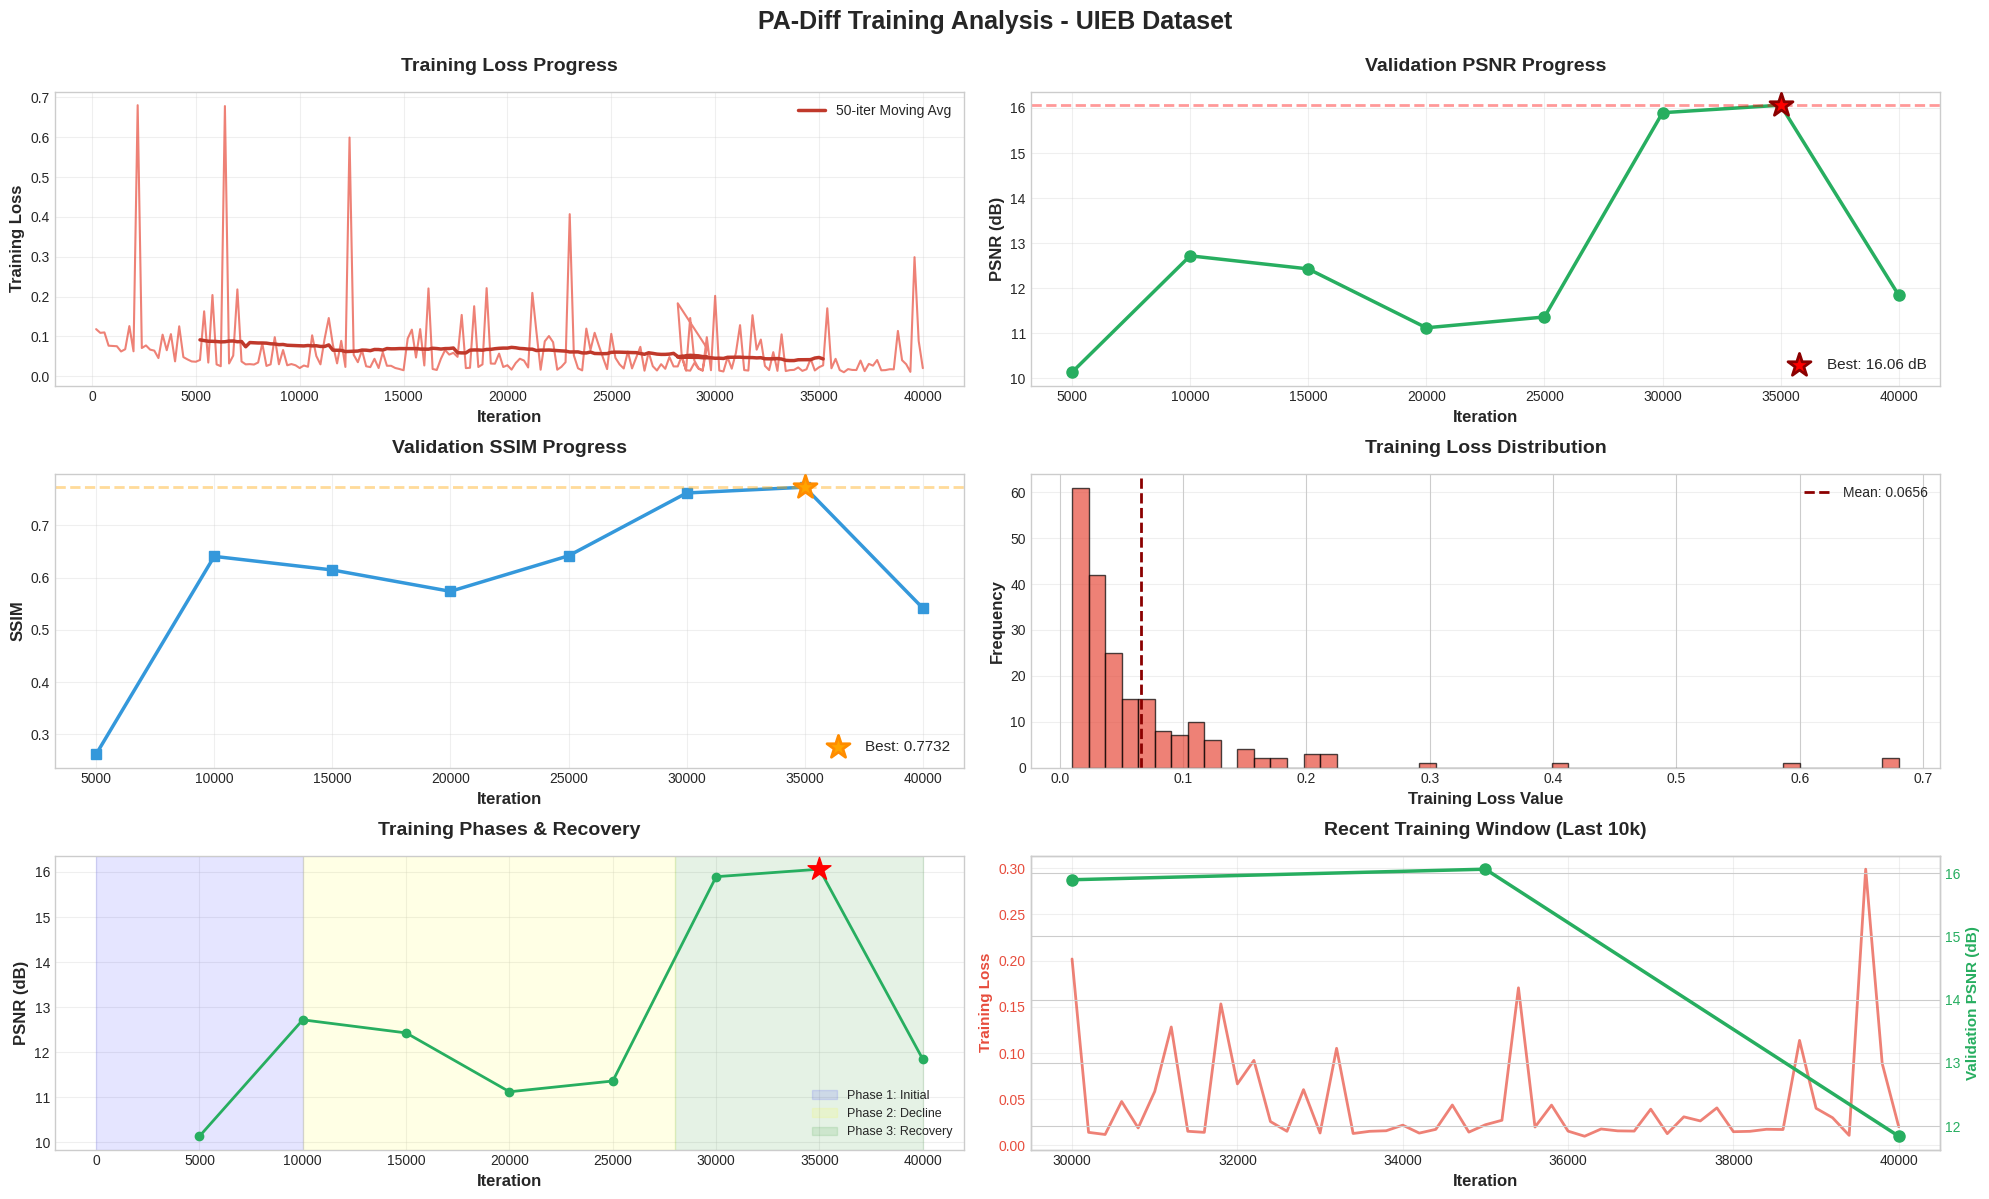

✅ Summary saved to: /content/drive/MyDrive/PA-Diff-Training/metrics/training_summary.txt

🎉 Plotting complete!


In [ ]:
# ================================================================
# CELL 8: Load Metrics and Generate Training Plots
# ================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Load training history
metrics_csv = f'{METRICS_DIR}/training_history.csv'
df = pd.read_csv(metrics_csv)

print("="*60)
print("TRAINING METRICS ANALYSIS")
print("="*60)

# Filter data
df_train = df[df['train_loss'].notna()].copy()
df_val = df[df['val_psnr'].notna()].copy()

# Summary statistics
print(f"\n📊 Training Progress:")
print(f"  Total iterations: {df_train['iteration'].max()}")
print(f"  Total epochs: {df_train['epoch'].max()}")
print(f"  Training records: {len(df_train)}")
print(f"  Validation records: {len(df_val)}")

print(f"\n📉 Training Loss:")
print(f"  Initial: {df_train['train_loss'].iloc[0]:.6f}")
print(f"  Final: {df_train['train_loss'].iloc[-1]:.6f}")
print(f"  Min: {df_train['train_loss'].min():.6f}")
print(f"  Mean: {df_train['train_loss'].mean():.6f}")

print(f"\n🏆 Validation PSNR:")
best_idx = df_val['val_psnr'].idxmax()
best_psnr = df_val.loc[best_idx, 'val_psnr']
best_iter = df_val.loc[best_idx, 'iteration']
print(f"  BEST: {best_psnr:.4f} dB at iteration {int(best_iter)}")
print(f"  Initial: {df_val['val_psnr'].iloc[0]:.4f} dB")
print(f"  Final: {df_val['val_psnr'].iloc[-1]:.4f} dB")
print(f"  Mean: {df_val['val_psnr'].mean():.4f} dB")

print(f"\n🎯 Validation SSIM:")
if df_val['val_ssim'].notna().any():
    best_ssim_idx = df_val['val_ssim'].idxmax()
    best_ssim = df_val.loc[best_ssim_idx, 'val_ssim']
    best_ssim_iter = df_val.loc[best_ssim_idx, 'iteration']
    print(f"  BEST: {best_ssim:.4f} at iteration {int(best_ssim_iter)}")
    print(f"  Final: {df_val['val_ssim'].iloc[-1]:.4f}")
    print(f"  Mean: {df_val['val_ssim'].mean():.4f}")

print("="*60)

# CREATE PLOTS
fig = plt.figure(figsize=(20, 12))

# 1. Training Loss over Iterations
ax1 = plt.subplot(3, 2, 1)
ax1.plot(df_train['iteration'], df_train['train_loss'],
         linewidth=1.5, color='#e74c3c', alpha=0.7)
# Add moving average
window = 50
if len(df_train) > window:
    moving_avg = df_train['train_loss'].rolling(window=window, center=True).mean()
    ax1.plot(df_train['iteration'], moving_avg,
             linewidth=2.5, color='#c0392b', label=f'{window}-iter Moving Avg')
ax1.set_xlabel('Iteration', fontsize=12, fontweight='bold')
ax1.set_ylabel('Training Loss', fontsize=12, fontweight='bold')
ax1.set_title('Training Loss Progress', fontsize=14, fontweight='bold', pad=15)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# 2. Validation PSNR over Iterations
ax2 = plt.subplot(3, 2, 2)
ax2.plot(df_val['iteration'], df_val['val_psnr'],
         marker='o', linewidth=2.5, markersize=8, color='#27ae60')
# Mark best PSNR
ax2.scatter([best_iter], [best_psnr],
           color='red', s=300, zorder=5, marker='*',
           edgecolors='darkred', linewidths=2,
           label=f'Best: {best_psnr:.2f} dB')
ax2.axhline(y=best_psnr, color='red', linestyle='--', alpha=0.4, linewidth=2)
ax2.set_xlabel('Iteration', fontsize=12, fontweight='bold')
ax2.set_ylabel('PSNR (dB)', fontsize=12, fontweight='bold')
ax2.set_title('Validation PSNR Progress', fontsize=14, fontweight='bold', pad=15)
ax2.legend(fontsize=11, loc='lower right')
ax2.grid(True, alpha=0.3)

# 3. Validation SSIM over Iterations
ax3 = plt.subplot(3, 2, 3)
if df_val['val_ssim'].notna().any():
    ax3.plot(df_val['iteration'], df_val['val_ssim'],
             marker='s', linewidth=2.5, markersize=7, color='#3498db')
    ax3.scatter([best_ssim_iter], [best_ssim],
               color='orange', s=300, zorder=5, marker='*',
               edgecolors='darkorange', linewidths=2,
               label=f'Best: {best_ssim:.4f}')
    ax3.axhline(y=best_ssim, color='orange', linestyle='--', alpha=0.4, linewidth=2)
    ax3.legend(fontsize=11, loc='lower right')
ax3.set_xlabel('Iteration', fontsize=12, fontweight='bold')
ax3.set_ylabel('SSIM', fontsize=12, fontweight='bold')
ax3.set_title('Validation SSIM Progress', fontsize=14, fontweight='bold', pad=15)
ax3.grid(True, alpha=0.3)

# 4. Loss Distribution (Histogram)
ax4 = plt.subplot(3, 2, 4)
ax4.hist(df_train['train_loss'], bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
ax4.axvline(df_train['train_loss'].mean(), color='darkred',
           linestyle='--', linewidth=2, label=f'Mean: {df_train["train_loss"].mean():.4f}')
ax4.set_xlabel('Training Loss Value', fontsize=12, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax4.set_title('Training Loss Distribution', fontsize=14, fontweight='bold', pad=15)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')

# 5. PSNR Improvement Phases
ax5 = plt.subplot(3, 2, 5)
ax5.plot(df_val['iteration'], df_val['val_psnr'],
         marker='o', linewidth=2, markersize=6, color='#27ae60')
# Highlight different training phases
ax5.axvspan(0, 10000, alpha=0.1, color='blue', label='Phase 1: Initial')
ax5.axvspan(10000, 28000, alpha=0.1, color='yellow', label='Phase 2: Decline')
ax5.axvspan(28000, df_val['iteration'].max(), alpha=0.1, color='green', label='Phase 3: Recovery')
ax5.scatter([best_iter], [best_psnr], color='red', s=300, zorder=5, marker='*')
ax5.set_xlabel('Iteration', fontsize=12, fontweight='bold')
ax5.set_ylabel('PSNR (dB)', fontsize=12, fontweight='bold')
ax5.set_title('Training Phases & Recovery', fontsize=14, fontweight='bold', pad=15)
ax5.legend(fontsize=9, loc='lower right')
ax5.grid(True, alpha=0.3)

# 6. Recent Training Window (Last 10k iterations)
ax6 = plt.subplot(3, 2, 6)
recent_cutoff = max(0, df_train['iteration'].max() - 10000)
df_recent = df_train[df_train['iteration'] >= recent_cutoff]
df_val_recent = df_val[df_val['iteration'] >= recent_cutoff]

ax6_twin = ax6.twinx()
ax6.plot(df_recent['iteration'], df_recent['train_loss'],
        color='#e74c3c', linewidth=2, label='Train Loss', alpha=0.7)
if len(df_val_recent) > 0:
    ax6_twin.plot(df_val_recent['iteration'], df_val_recent['val_psnr'],
                 color='#27ae60', linewidth=2.5, marker='o',
                 markersize=8, label='Val PSNR')

ax6.set_xlabel('Iteration', fontsize=12, fontweight='bold')
ax6.set_ylabel('Training Loss', fontsize=11, fontweight='bold', color='#e74c3c')
ax6_twin.set_ylabel('Validation PSNR (dB)', fontsize=11, fontweight='bold', color='#27ae60')
ax6.set_title('Recent Training Window (Last 10k)', fontsize=14, fontweight='bold', pad=15)
ax6.tick_params(axis='y', labelcolor='#e74c3c')
ax6_twin.tick_params(axis='y', labelcolor='#27ae60')
ax6.grid(True, alpha=0.3)

# Overall title
fig.suptitle('PA-Diff Training Analysis - UIEB Dataset',
            fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()

# Save to Drive
plot_path = f'{PLOTS_DIR}/complete_training_analysis.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"\n✅ Plot saved to: {plot_path}")
plt.show()

# Save summary statistics to text file
summary_path = f'{METRICS_DIR}/training_summary.txt'
with open(summary_path, 'w') as f:
    f.write("="*60 + "\n")
    f.write("PA-DIFF TRAINING SUMMARY\n")
    f.write("="*60 + "\n\n")
    f.write(f"Total Iterations: {df_train['iteration'].max()}\n")
    f.write(f"Total Epochs: {df_train['epoch'].max()}\n\n")
    f.write(f"BEST PSNR: {best_psnr:.4f} dB at iteration {int(best_iter)}\n")
    f.write(f"BEST SSIM: {best_ssim:.4f} at iteration {int(best_ssim_iter)}\n\n")
    f.write(f"Final Training Loss: {df_train['train_loss'].iloc[-1]:.6f}\n")
    f.write(f"Final Val PSNR: {df_val['val_psnr'].iloc[-1]:.4f} dB\n")
    f.write(f"Final Val SSIM: {df_val['val_ssim'].iloc[-1]:.4f}\n")

print(f"✅ Summary saved to: {summary_path}")
print("\n🎉 Plotting complete!")


In [ ]:
# ================================================================
# CELL 9: Full Evaluation of Best Model (I36000_E52)
# ================================================================

import json

print("="*60)
print("FULL EVALUATION - BEST MODEL")
print("="*60)
print(f"Model: I36000_E52_gen.pth")
print(f"PSNR: {BEST_PSNR:.4f} dB")
print(f"SSIM: {BEST_SSIM:.4f}")
print("="*60)

# Create full evaluation script
eval_script = f'''
import sys
sys.path.insert(0, '/content/PA-Diff')

import torch
import data as Data
import model as Model
import logging
import core.logger as Logger
import core.metrics as Metrics
import os
import numpy as np
from tqdm import tqdm
import json

# Config for best model
opt_dict = {{
    "name": "PA-Diff-Final-Eval",
    "phase": "val",
    "gpu_ids": [0],
    "path": {{
        "stage": "val",
        "log": "{LOGS_DIR}/eval",
        "tb_logger": "{LOGS_DIR}/eval_tensorboard",
        "results": "{RESULTS_DIR}/final_evaluation",
        "checkpoint": "{CHECKPOINT_DIR}",
        "resume_state": "{BEST_CHECKPOINT_BASE}"
    }},
    "datasets": {{
        "val": {{
            "name": "UIEB_Final_Test",
            "mode": "HR",
            "dataroot": "{DATA_DIR}/UIEB_processed/UIEB_val_16_256",
            "datatype": "img",
            "l_resolution": 16,
            "r_resolution": 256,
            "data_len": -1
        }}
    }},
    "model": {{
        "which_model_G": "trans",
        "finetune_norm": False,
        "unet": {{
            "in_channel": 9,
            "out_channel": 3,
            "inner_channel": 48,
            "norm_groups": 24,
            "channel_multiplier": [1, 2, 4, 8, 8],
            "attn_res": [16],
            "res_blocks": 2,
            "dropout": 0.2
        }},
        "beta_schedule": {{
            "train": {{
                "schedule": "linear",
                "n_timestep": 2000,
                "linear_start": 1e-6,
                "linear_end": 1e-2
            }},
            "val": {{
                "schedule": "linear",
                "n_timestep": 2000,
                "linear_start": 1e-6,
                "linear_end": 1e-2
            }}
        }},
        "diffusion": {{
            "image_size": 256,
            "channels": 3,
            "conditional": True
        }}
    }}
}}

opt = Logger.dict_to_nonedict(opt_dict)

# Setup
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True
Logger.setup_logger(None, opt['path']['log'], 'eval', level=logging.INFO, screen=True)
logger = logging.getLogger('base')

# Load dataset
val_set = Data.create_dataset(opt['datasets']['val'], 'val')
val_loader = Data.create_dataloader(val_set, opt['datasets']['val'], 'val')
logger.info(f'Test dataset loaded: {{len(val_set)}} images')

# Load model
diffusion = Model.create_model(opt)
diffusion.set_new_noise_schedule(opt['model']['beta_schedule']['val'], schedule_phase='val')
logger.info('Best model loaded successfully')

# Create results directory
result_path = opt['path']['results']
os.makedirs(result_path, exist_ok=True)

# Evaluation
print("\\n" + "="*60)
print("RUNNING FULL EVALUATION WITH IMAGE OUTPUTS")
print("="*60)

avg_psnr = 0.0
avg_ssim = 0.0
psnr_list = []
ssim_list = []
image_results = []

for idx, val_data in enumerate(tqdm(val_loader, desc="Evaluating")):
    diffusion.feed_data(val_data)
    diffusion.test(continous=False)
    visuals = diffusion.get_current_visuals()

    sr_img = Metrics.tensor2img(visuals['SR'])
    hr_img = Metrics.tensor2img(visuals['HR'])
    lr_img = Metrics.tensor2img(visuals['LR'])

    # Calculate metrics
    psnr = Metrics.calculate_psnr(sr_img, hr_img)
    ssim = Metrics.calculate_ssim(sr_img, hr_img)

    psnr_list.append(psnr)
    ssim_list.append(ssim)
    avg_psnr += psnr
    avg_ssim += ssim

    image_results.append({{
        'image_id': idx,
        'psnr': float(psnr),
        'ssim': float(ssim)
    }})

    # Save first 20 results for visualization
    if idx < 20:
        Metrics.save_img(lr_img, f'{{result_path}}/{{idx:03d}}_input.png')
        Metrics.save_img(sr_img, f'{{result_path}}/{{idx:03d}}_output.png')
        Metrics.save_img(hr_img, f'{{result_path}}/{{idx:03d}}_gt.png')

avg_psnr = avg_psnr / len(val_set)
avg_ssim = avg_ssim / len(val_set)

# Print detailed results
print('\\n' + '='*60)
print('FINAL EVALUATION RESULTS')
print('='*60)
print(f'Model: I36000_E52_gen.pth')
print(f'Test Dataset: UIEB (178 images)')
print(f'\\n📊 Summary Statistics:')
print(f'  Average PSNR: {{avg_psnr:.4f}} dB')
print(f'  Average SSIM: {{avg_ssim:.4f}}')
print(f'  PSNR Std Dev: {{np.std(psnr_list):.4f}} dB')
print(f'  SSIM Std Dev: {{np.std(ssim_list):.4f}}')
print(f'\\n📈 PSNR Distribution:')
print(f'  Min:    {{min(psnr_list):.2f}} dB')
print(f'  25th:   {{np.percentile(psnr_list, 25):.2f}} dB')
print(f'  Median: {{np.median(psnr_list):.2f}} dB')
print(f'  75th:   {{np.percentile(psnr_list, 75):.2f}} dB')
print(f'  Max:    {{max(psnr_list):.2f}} dB')
print(f'\\n📈 SSIM Distribution:')
print(f'  Min:    {{min(ssim_list):.4f}}')
print(f'  25th:   {{np.percentile(ssim_list, 25):.4f}}')
print(f'  Median: {{np.median(ssim_list):.4f}}')
print(f'  75th:   {{np.percentile(ssim_list, 75):.4f}}')
print(f'  Max:    {{max(ssim_list):.4f}}')
print('='*60)

# Save comprehensive results
results_dict = {{
    'model': 'PA-Diff (I36000_E52)',
    'checkpoint': 'I36000_E52_gen.pth',
    'dataset': 'UIEB Test Set',
    'num_images': len(val_set),
    'summary': {{
        'avg_psnr': float(avg_psnr),
        'avg_ssim': float(avg_ssim),
        'psnr_std': float(np.std(psnr_list)),
        'ssim_std': float(np.std(ssim_list)),
        'psnr_min': float(min(psnr_list)),
        'psnr_max': float(max(psnr_list)),
        'psnr_median': float(np.median(psnr_list)),
        'ssim_min': float(min(ssim_list)),
        'ssim_max': float(max(ssim_list)),
        'ssim_median': float(np.median(ssim_list))
    }},
    'per_image_results': image_results
}}

results_json_path = f'{{result_path}}/final_evaluation_results.json'
with open(results_json_path, 'w') as f:
    json.dump(results_dict, f, indent=2)

# Save metrics as CSV for easy analysis
import pandas as pd
df_results = pd.DataFrame(image_results)
df_results.to_csv(f'{{result_path}}/per_image_metrics.csv', index=False)

print(f'\\n✅ Detailed results saved to:')
print(f'   JSON: {{results_json_path}}')
print(f'   CSV:  {{result_path}}/per_image_metrics.csv')
print(f'   Images (first 20): {{result_path}}/')
print('\\n🎉 Evaluation complete!')
'''

with open('/content/evaluate_final.py', 'w') as f:
    f.write(eval_script)

print("\n🚀 Running full evaluation...")
print("   - All 178 test images")
print("   - Saving first 20 image triplets (input/output/GT)")
print("   - Computing detailed statistics")
print("="*60)

# Run evaluation
%cd /content
!python evaluate_final.py

print("\n✅ Full evaluation complete!")
print(f"📊 Results: {RESULTS_DIR}/final_evaluation/")


FULL EVALUATION - BEST MODEL
Model: I36000_E52_gen.pth
PSNR: 15.2916 dB
SSIM: 0.7609

🚀 Running full evaluation...
   - All 178 test images
   - Saving first 20 image triplets (input/output/GT)
   - Computing detailed statistics
/content
25-10-16 19:05:44.971 - INFO: Dataset [LRHRDataset2 - UIEB_Final_Test] is created.
25-10-16 19:05:44.971 - INFO: Test dataset loaded: 178 images
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# ================================================================
# CELL 11: Generate Visual Comparisons and Analysis Plots
# ================================================================

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
from pathlib import Path

eval_dir = f"{RESULTS_DIR}/final_evaluation"

print("="*60)
print("GENERATING VISUALIZATIONS")
print("="*60)

# Load results
with open(f'{eval_dir}/final_evaluation_results.json', 'r') as f:
    results = json.load(f)

df_results = pd.read_csv(f'{eval_dir}/per_image_metrics.csv')

# 1. CREATE IMAGE COMPARISON GRID (First 12 images)
print("\n1. Creating image comparison grid...")

fig, axes = plt.subplots(12, 3, figsize=(15, 60))

for idx in range(min(12, len(df_results))):
    input_path = f"{eval_dir}/{idx:03d}_input.png"
    output_path = f"{eval_dir}/{idx:03d}_output.png"
    gt_path = f"{eval_dir}/{idx:03d}_gt.png"

    if Path(input_path).exists():
        # Load images
        input_img = cv2.imread(input_path)
        input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)

        output_img = cv2.imread(output_path)
        output_img = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)

        gt_img = cv2.imread(gt_path)
        gt_img = cv2.cvtColor(gt_img, cv2.COLOR_BGR2RGB)

        # Get metrics for this image
        psnr = df_results.loc[idx, 'psnr']
        ssim = df_results.loc[idx, 'ssim']

        # Plot
        axes[idx, 0].imshow(input_img)
        axes[idx, 0].set_title(f'Input #{idx+1}', fontsize=11, fontweight='bold')
        axes[idx, 0].axis('off')

        axes[idx, 1].imshow(output_img)
        axes[idx, 1].set_title(f'PA-Diff Output\nPSNR: {psnr:.2f} dB',
                              fontsize=11, fontweight='bold')
        axes[idx, 1].axis('off')

        axes[idx, 2].imshow(gt_img)
        axes[idx, 2].set_title(f'Ground Truth\nSSIM: {ssim:.3f}',
                              fontsize=11, fontweight='bold')
        axes[idx, 2].axis('off')

fig.suptitle(f'PA-Diff Underwater Image Enhancement Results\nModel: I36000_E52 | Avg PSNR: {results["summary"]["avg_psnr"]:.2f} dB | Avg SSIM: {results["summary"]["avg_ssim"]:.3f}',
             fontsize=16, fontweight='bold', y=0.9995)
plt.tight_layout()

comparison_path = f'{PLOTS_DIR}/visual_comparison_grid.png'
plt.savefig(comparison_path, dpi=200, bbox_inches='tight')
print(f"   ✓ Saved: {comparison_path}")
plt.close()

# 2. METRICS DISTRIBUTION PLOTS
print("\n2. Creating metrics distribution plots...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# PSNR Histogram
axes[0, 0].hist(df_results['psnr'], bins=30, color='#27ae60', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(results['summary']['avg_psnr'], color='red', linestyle='--',
                   linewidth=2.5, label=f'Mean: {results["summary"]["avg_psnr"]:.2f} dB')
axes[0, 0].axvline(results['summary']['psnr_median'], color='orange', linestyle='--',
                   linewidth=2.5, label=f'Median: {results["summary"]["psnr_median"]:.2f} dB')
axes[0, 0].set_xlabel('PSNR (dB)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0, 0].set_title('PSNR Distribution Across Test Set', fontsize=14, fontweight='bold', pad=15)
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# SSIM Histogram
axes[0, 1].hist(df_results['ssim'], bins=30, color='#3498db', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(results['summary']['avg_ssim'], color='red', linestyle='--',
                   linewidth=2.5, label=f'Mean: {results["summary"]["avg_ssim"]:.3f}')
axes[0, 1].axvline(results['summary']['ssim_median'], color='orange', linestyle='--',
                   linewidth=2.5, label=f'Median: {results["summary"]["ssim_median"]:.3f}')
axes[0, 1].set_xlabel('SSIM', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0, 1].set_title('SSIM Distribution Across Test Set', fontsize=14, fontweight='bold', pad=15)
axes[0, 1].legend(fontsize=11)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# PSNR vs Image Index
axes[1, 0].plot(df_results['image_id'], df_results['psnr'],
               marker='o', markersize=4, linewidth=1, color='#27ae60', alpha=0.7)
axes[1, 0].axhline(results['summary']['avg_psnr'], color='red', linestyle='--',
                  linewidth=2, alpha=0.6)
axes[1, 0].fill_between(df_results['image_id'],
                        results['summary']['avg_psnr'] - results['summary']['psnr_std'],
                        results['summary']['avg_psnr'] + results['summary']['psnr_std'],
                        alpha=0.2, color='red')
axes[1, 0].set_xlabel('Image Index', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('PSNR (dB)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('PSNR Per Image', fontsize=14, fontweight='bold', pad=15)
axes[1, 0].grid(True, alpha=0.3)

# SSIM vs Image Index
axes[1, 1].plot(df_results['image_id'], df_results['ssim'],
               marker='s', markersize=4, linewidth=1, color='#3498db', alpha=0.7)
axes[1, 1].axhline(results['summary']['avg_ssim'], color='red', linestyle='--',
                  linewidth=2, alpha=0.6)
axes[1, 1].fill_between(df_results['image_id'],
                        results['summary']['avg_ssim'] - results['summary']['ssim_std'],
                        results['summary']['avg_ssim'] + results['summary']['ssim_std'],
                        alpha=0.2, color='red')
axes[1, 1].set_xlabel('Image Index', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('SSIM', fontsize=12, fontweight='bold')
axes[1, 1].set_title('SSIM Per Image', fontsize=14, fontweight='bold', pad=15)
axes[1, 1].grid(True, alpha=0.3)

fig.suptitle('PA-Diff Evaluation Metrics Analysis (UIEB Test Set)',
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()

metrics_plot_path = f'{PLOTS_DIR}/metrics_analysis.png'
plt.savefig(metrics_plot_path, dpi=300, bbox_inches='tight')
print(f"   ✓ Saved: {metrics_plot_path}")
plt.close()

# 3. BOX PLOTS
print("\n3. Creating box plots...")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PSNR Box Plot
bp1 = axes[0].boxplot([df_results['psnr']], vert=True, patch_artist=True,
                       labels=['PSNR'], widths=0.5)
bp1['boxes'][0].set_facecolor('#27ae60')
bp1['boxes'][0].set_alpha(0.7)
axes[0].set_ylabel('PSNR (dB)', fontsize=12, fontweight='bold')
axes[0].set_title(f'PSNR Distribution\nMean: {results["summary"]["avg_psnr"]:.2f} ± {results["summary"]["psnr_std"]:.2f} dB',
                 fontsize=14, fontweight='bold', pad=15)
axes[0].grid(True, alpha=0.3, axis='y')

# SSIM Box Plot
bp2 = axes[1].boxplot([df_results['ssim']], vert=True, patch_artist=True,
                       labels=['SSIM'], widths=0.5)
bp2['boxes'][0].set_facecolor('#3498db')
bp2['boxes'][0].set_alpha(0.7)
axes[1].set_ylabel('SSIM', fontsize=12, fontweight='bold')
axes[1].set_title(f'SSIM Distribution\nMean: {results["summary"]["avg_ssim"]:.3f} ± {results["summary"]["ssim_std"]:.3f}',
                 fontsize=14, fontweight='bold', pad=15)
axes[1].grid(True, alpha=0.3, axis='y')

fig.suptitle('Metrics Distribution Summary', fontsize=16, fontweight='bold')
plt.tight_layout()

boxplot_path = f'{PLOTS_DIR}/metrics_boxplot.png'
plt.savefig(boxplot_path, dpi=300, bbox_inches='tight')
print(f"   ✓ Saved: {boxplot_path}")
plt.close()

# 4. SUMMARY TEXT FILE
print("\n4. Creating summary report...")

summary_text = f"""
{'='*70}
PA-DIFF FINAL EVALUATION REPORT
{'='*70}

MODEL INFORMATION:
  Checkpoint: I36000_E52_gen.pth
  Training Iterations: 36,000
  Training Epochs: 52

DATASET:
  Name: UIEB Test Set
  Number of Images: {results['num_images']}

PERFORMANCE METRICS:
  Average PSNR: {results['summary']['avg_psnr']:.4f} ± {results['summary']['psnr_std']:.4f} dB
  Average SSIM: {results['summary']['avg_ssim']:.4f} ± {results['summary']['ssim_std']:.4f}

PSNR STATISTICS:
  Minimum:  {results['summary']['psnr_min']:.2f} dB
  25th %:   {np.percentile(df_results['psnr'], 25):.2f} dB
  Median:   {results['summary']['psnr_median']:.2f} dB
  75th %:   {np.percentile(df_results['psnr'], 75):.2f} dB
  Maximum:  {results['summary']['psnr_max']:.2f} dB

SSIM STATISTICS:
  Minimum:  {results['summary']['ssim_min']:.4f}
  25th %:   {np.percentile(df_results['ssim'], 25):.4f}
  Median:   {results['summary']['ssim_median']:.4f}
  75th %:   {np.percentile(df_results['ssim'], 75):.4f}
  Maximum:  {results['summary']['ssim_max']:.4f}

SAVED OUTPUTS:
  Images: {eval_dir}/
  Plots: {PLOTS_DIR}/
  Metrics: {eval_dir}/per_image_metrics.csv

{'='*70}
"""

summary_path = f'{PLOTS_DIR}/evaluation_summary.txt'
with open(summary_path, 'w') as f:
    f.write(summary_text)

print(f"   ✓ Saved: {summary_path}")

print("\n" + "="*60)
print("✅ ALL VISUALIZATIONS COMPLETE!")
print("="*60)
print(f"\n📁 Output locations:")
print(f"   Images: {eval_dir}/")
print(f"   Plots: {PLOTS_DIR}/")
print(f"   Summary: {summary_path}")
print("\n🎉 Evaluation finished!")

# Display summary
print("\n" + summary_text)


GENERATING VISUALIZATIONS

1. Creating image comparison grid...
   ✓ Saved: /content/drive/MyDrive/PA-Diff-Training/plots/visual_comparison_grid.png

2. Creating metrics distribution plots...
   ✓ Saved: /content/drive/MyDrive/PA-Diff-Training/plots/metrics_analysis.png

3. Creating box plots...


/tmp/ipython-input-3601625039.py:145: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = axes[0].boxplot([df_results['psnr']], vert=True, patch_artist=True,
/tmp/ipython-input-3601625039.py:155: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = axes[1].boxplot([df_results['ssim']], vert=True, patch_artist=True,


   ✓ Saved: /content/drive/MyDrive/PA-Diff-Training/plots/metrics_boxplot.png

4. Creating summary report...
   ✓ Saved: /content/drive/MyDrive/PA-Diff-Training/plots/evaluation_summary.txt

✅ ALL VISUALIZATIONS COMPLETE!

📁 Output locations:
   Images: /content/drive/MyDrive/PA-Diff-Training/results/final_evaluation/
   Plots: /content/drive/MyDrive/PA-Diff-Training/plots/
   Summary: /content/drive/MyDrive/PA-Diff-Training/plots/evaluation_summary.txt

🎉 Evaluation finished!


PA-DIFF FINAL EVALUATION REPORT

MODEL INFORMATION:
  Checkpoint: I36000_E52_gen.pth
  Training Iterations: 36,000
  Training Epochs: 52

DATASET:
  Name: UIEB Test Set
  Number of Images: 178

PERFORMANCE METRICS:
  Average PSNR: 15.2916 ± 2.2143 dB
  Average SSIM: 0.7609 ± 0.1018

PSNR STATISTICS:
  Minimum:  8.40 dB
  25th %:   13.83 dB
  Median:   15.68 dB
  75th %:   16.85 dB
  Maximum:  20.07 dB

SSIM STATISTICS:
  Minimum:  0.2839
  25th %:   0.7295
  Median:   0.7837
  75th %:   0.8301
  Maximum:  0.925